<a href="https://colab.research.google.com/github/karyeija/UICT-DataScience-Class/blob/main/Captone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: KARYEIJA FELEX

## ***Objective***
<li>Recommend the appropriate crops to grow based on soil and environmental factors.

### Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# loading files from google drive
from google.colab import drive
drive.mount('/content/drive/')
doc='/content/drive/MyDrive/UICT_DATA_SCIENCE_AUG_2025/Crop_recommendation.csv'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### <b>Loading the attached CSV data for crop recommendation.

In [27]:
df=pd.read_csv(doc,encoding='utf-8')

### Show the first few rows to confirm the data is loaded correctly

In [28]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Overview of the dataset

In [29]:
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Check for missing values

In [30]:
missing_values = df.isnull().sum()
missing_values # No missing values found

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


### Check for duplicates

In [31]:
duplicates = df.duplicated().sum()
duplicates # No duplicates found

np.int64(0)

### Display basic statistics to identify outliers or irregularities

In [32]:
stats = df.describe()
stats

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



**Summary**
<li> 2200 entries with 8 columns</li>
<li> 8 columns: N, P, K, temperature, humidity, pH, rainfall, and label</li>
<li> No missing values found.</li>
<li> No duplicate rows.
<li>Data types seem consistent.
<br>The numerical columns show a reasonable distribution of values with no apparent extreme outliers based on summary statistics. The label column is categorical, representing different crop types.

# <b>Feature selection</b>
All the features (N, P, K, temperature, humidity, ph, rainfall) are relevant as they impact crop growth. Depending on the analysis or model design, some features might be more influential than others, but all represent critical environmental or soil conditions for crop selection.

### Display count of each Crop label



In [33]:
label_counts = df['label'].value_counts()
label_counts

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


## Separate features and target variable

In [35]:
X = df.drop('label', axis=1)
y = df['label']

#split the dataset into train and test data

In [41]:
#split the dataset into train and test data, before encoding or scaling to prevent data leakage
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
print("Training target:", y_train.shape[0])
print("Testing target:", y_test.shape[0])

Training set: (1760, 7)
Testing set: (440, 7)
Training target: 1760
Testing target: 440


 ## Preprocessing for numerical and categorical features

In [42]:
#import sklearn libraries - for Machine learning in python
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline #automating machine learning workflows
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Identify categorical and numerical columns - using the independent variable training data


In [43]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = X_train.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:", cat_features)
print("Numerical features:", num_features)

Categorical features: []
Numerical features: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


## Creating the preprocessor a column transformer to apply different transformations to different columns

In [44]:
ss = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#define what should be done (scale the numerical features, encode the categorical ones to the specified columns)
prep = ColumnTransformer(
    transformers=[
        ('num', ss, num_features),
        ('cat', ohe, cat_features)])

In [45]:
#Fit and transform training dataset - learns mean and std in each cat and scales
X_train_processed = prep.fit_transform(X_train)

#transform test datset - uses what has been learned from x_train and to scale num features
X_test_processed = prep.transform(X_test)


# <u>**Train and assess Classification models**</u>

Perform a comparison between the Decision Tree and Logistic Regression algorithms based on their performance.

**Metrics for Classification Evaluation**

Assess the Decision Tree model using key classification metrics by computing accuracy, precision, recall, and F1-score.

1. **_Accuracy_** → Reflects the overall correctness of the model's predictions. Best applied when the class distribution is balanced (e.g., 50% sold, 50% not sold). Calculated as $$\frac{TP + TN}{TP + TN + FP + FN}$$

2. **_Precision_** → Indicates the proportion of predicted positive cases that are truly positive. Important when false positives carry significant consequences (e.g., incorrectly informing a customer that their car will sell). Calculated as $$\frac{TP}{TP + FP}$$

3. **_Recall_** → Represents the proportion of actual positive cases that were correctly detected. Crucial when false negatives are costly (e.g., missing cars that would actually sell). Calculated as $$\frac{TP}{TP + FN}$$

4. **_F1 Score_** → The harmonic mean of precision and recall, providing a balance between the two metrics. Especially useful when dealing with imbalanced datasets. Calculated as $$2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

## Initialize and train the Random Forest Classifier


In [ ]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

#Train decision treee - dt


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42).fit(X_train_processed, y_train)
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [50]:
# Predict on the test data
y_pred_dt = dt_model.predict(X_test_processed)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print the metrics
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"Decision Tree Precision: {precision_dt:.3f}")
print(f"Decision Tree Recall: {recall_dt:.3f}")
print(f"Decision Tree F1-score: {f1_dt:.3f}")

Decision Tree Accuracy: 0.980
Decision Tree Precision: 0.981
Decision Tree Recall: 0.980
Decision Tree F1-score: 0.979


#Train Logistic Regression lr


In [51]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=42).fit(X_train_processed, y_train)
print("Logistic Regression model trained successfully.")


Logistic Regression model trained successfully.


In [54]:
#Predict on the test data
y_pred_lr = lr_model.predict(X_test_processed)

#evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr,average='weighted')
recall_lr = recall_score(y_test, y_pred_lr,average='weighted')
f1_lr = f1_score(y_test, y_pred_lr,average='weighted')

# Print the calculated evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1-score: {f1_lr:.4f}")

Logistic Regression Accuracy: 0.9727
Logistic Regression Precision: 0.9740
Logistic Regression Recall: 0.9727
Logistic Regression F1-score: 0.9725


## **Analyze the Confusion Matrix**

A Confusion Matrix is a table used to evaluate classification models. It compares the model’s predicted classes against the actual (true) classes.





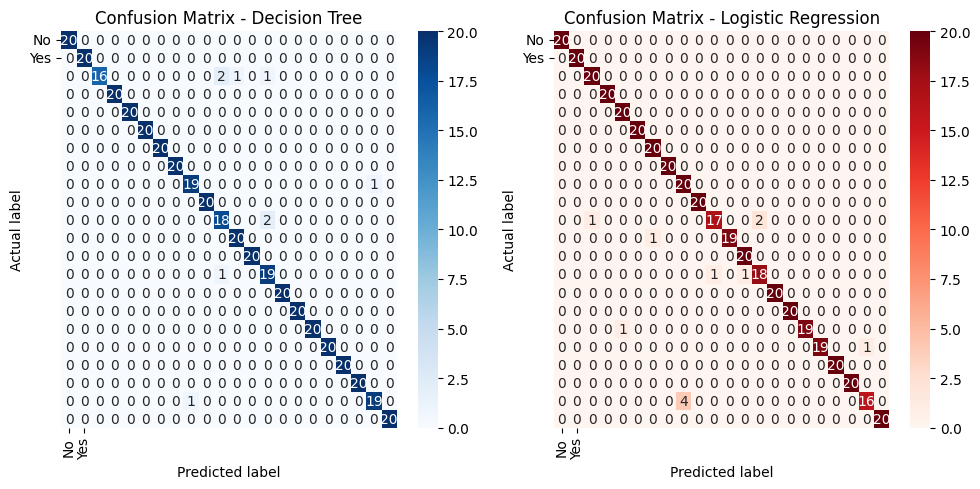

In [55]:
#Subplots of Decision tree and Logistic Regression confusion matrix
from sklearn.metrics import confusion_matrix


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

#Calculate confusion matrix (cm) for Decision tree and Logistic Regression
dt_cm = confusion_matrix(y_test, y_pred_dt)
lr_cm = confusion_matrix(y_test, y_pred_lr)

#subplot of Decision Tree
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=ax1, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('Actual label')
ax1.set_title('Confusion Matrix - Decision Tree')

#subplot of Logistic Regression
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds', ax=ax2, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_title('Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()

## Compare prediction performance of the models with unseen data



In [58]:
# Create a DataFrame to compare actual vs. predicted values
# The index of y_test corresponds to the original row indices from the 'cars' DataFrame
comparison_df = pd.DataFrame({
    'Actual_Crop': y_test, # The true values from the test set
    'dt_Prediction': y_pred_dt, # Decision Tree predictions
    'lr_Prediction': y_pred_lr  # Logistic Regression predictions
})

print(comparison_df.head(10))

     Actual_Crop dt_Prediction lr_Prediction
1609      orange        orange        orange
1072      banana        banana        banana
1912      cotton        cotton        cotton
100        maize         maize         maize
1645      orange        orange        orange
221     chickpea      chickpea      chickpea
28          rice          rice          rice
701    blackgram     blackgram     blackgram
1097      banana        banana        banana
1638      orange        orange        orange


# ANALYSIS

<Li>Both models exhibit very high performance with accuracies above 97%, indicating excellent overall correctness in classification.

<Li>The Decision Tree has slightly higher accuracy (0.980 vs. 0.9727), precision (0.981 vs. 0.9740), recall (0.980 vs. 0.9727), and F1-score (0.979 vs. 0.9725) compared to Logistic Regression.

<Li>This suggests that the Decision Tree model performs better at correctly identifying positive and negative cases, with a marginally superior balance between precision and recall.

<Li>Decision Trees tend to handle non-linear relationships and interactions between variables better, which might explain the better metrics on this dataset.

<Li>Logistic Regression, which models a linear relationship, still performs very well and is often preferred for its simplicity and interpretability.

<Li>Ultimately, the choice between the two models depends on the data characteristics, interpretability needs, and specific project goals, but here the Decision Tree shows a slight edge in predictive performance.</li>